In [1]:
import pandas as pd
from chow import *

# Load Data

In this example we look at avocado prices in different regions. The data can be downloaded from https://www.kaggle.com/neuromusic/avocado-prices.

In [2]:
df = pd.read_csv('data/avocado.csv', usecols=['Date', 'region', 'AveragePrice'])[['region', 'Date', 'AveragePrice']]
df.Date = pd.to_datetime(df.Date)
df.head()

,region,Date,AveragePrice
0,Albany,2015-12-27,1.33
1,Albany,2015-12-20,1.35
2,Albany,2015-12-13,0.93
3,Albany,2015-12-06,1.08
4,Albany,2015-11-29,1.28


First we aggregate the AveragePrice for each month (within each region). The function chow_test requires evenly spaced observations.

In [3]:
df = df.groupby([df.columns[0], pd.Grouper(key=df.columns[1], freq='M')]).mean()

In [4]:
df.head()

AveragePrice
region Date                    
Albany 2015-01-31       1.50875
       2015-02-28       1.39500
       2015-03-31       1.44400
       2015-04-30       1.53125
       2015-05-31       1.60200

# Chow Test

The function chow_test accepts a time series in the following format (with a DatetimeIndex):

In [5]:
df.loc['Albany'].head()

,AveragePrice
Date,
2015-01-31,1.50875
2015-02-28,1.39500
2015-03-31,1.44400
2015-04-30,1.53125
2015-05-31,1.60200


We can compute the p-value of the chow_test at a breakpoint as follows:

In [6]:
chow_test(df.loc['Albany'], '2016-07')

0.03855808183066315

The regression lines can easily be visualized:

p-value: 0.03855808183066315


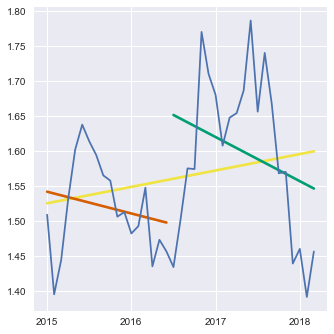

In [7]:
plot_chow(df.loc['Albany'], '2016-07')

p-value: 1.2150551889167168e-06


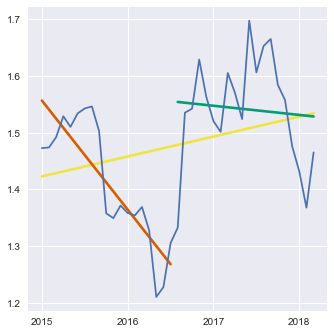

In [8]:
plot_chow(df.loc['NorthernNewEngland'], '2016-08')

p-value: 0.7573269959281264


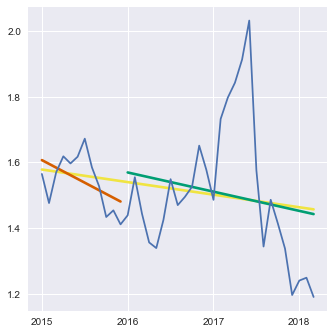

In [9]:
plot_chow(df.loc['BuffaloRochester'], '2016')

To compute the p-value for all regions we can use the function chow_test_all.

In [10]:
chow_test_all(df, '2016')

,p-value
region,
Albany,0.851368
Atlanta,0.039202
BaltimoreWashington,0.116903
Boise,0.000530
Boston,0.000597
BuffaloRochester,0.757327
California,0.154403
Charlotte,0.069916
Chicago,0.453853
